In [47]:
import numpy as np
import matplotlib.pyplot as plt
import tarfile 
import pandas as pd

#tar = tarfile.open("July4th.tar")
#tar.extractall()
#tar.close()


#data=np.genfromtxt('July4th.tar')
#data=np.load('July4th.tar')
#print(tar)

In [2]:
#Run for multiple years
stations = ['CCA', 'CCC', 'CLC', 'DAW', 'DTP', 'HAR', 'JRC2', 'LRL', 'SLA', 'SRT', 'TOW2', 'WBM', 'WBS', 'WCS2', 'WMF','WOR', 'WRC2' ]
station_data = pd.read_csv('station_info_unique.txt', delimiter=' ')

df=station_data

with open("outputA.txt", "a") as f:
  #print("Hello stackoverflow!", file=f)
  #print("I have a question.", file=f)



    for sta in stations:

        station_loc=df[(df['filename']=='CI.'+str(sta)+'..HHE.npy')]

        data=np.load('C:/Users/medmbaid/Documents/Alan_Turing_DSG/July4th/CI.'+str(sta)+'..HHE.npy')
        Wav_meanHHE=np.max(data[1000:2000])
        Max_loc1=data.argmax()
        #print(np.where(Wav_meanHHE))
        data=np.load('C:/Users/medmbaid/Documents/Alan_Turing_DSG/July4th/CI.'+str(sta)+'..HHN.npy')
        Wav_meanHHN=np.max(data[1000:2000])
        Max_loc2=data.argmax()
        #print(np.where(Wav_meanHHN))
        data=np.load('C:/Users/medmbaid/Documents/Alan_Turing_DSG/July4th/CI.'+str(sta)+'..HHZ.npy')
        Wav_meanHHZ=np.max(data[1000:2000])
        Max_loc3=data.argmax()
        #print(np.where(Wav_meanHHZ))

        #if sta == 'CCA':
            #lat=; lon=; height=

        print(Wav_meanHHE,Wav_meanHHN,Wav_meanHHZ,Max_loc1,Max_loc2,Max_loc3,station_loc['lat'].astype("float").to_list()[0],station_loc['lon'].astype("float").to_list()[0],station_loc['elevation'].astype("float").to_list()[0], file=f)




In [3]:
Compiled_data = pd.read_csv('outputA.txt', delimiter=' ')
print(Compiled_data.head())

   5.766476315381313e-09  5.293241978283222e-09  4.149445539760124e-09  \
0           5.840554e-08           1.292371e-07           1.036739e-07   
1           4.824228e-08           1.200260e-09           1.332818e-08   
2           3.297897e-08           3.460322e-08           3.115825e-09   
3           5.225348e-08           4.148908e-09           3.242134e-09   
4           1.524677e-08           4.913917e-09           2.535930e-09   

   6326976  6327006  6326110  35.15252  -118.01649   710.0  
0  6325696  6325459  6326350  35.52495  -117.36453   670.0  
1  6323761  6324624  6324666  35.81574  -117.59751   775.0  
2  6325757  6325355  6325381  36.27148  -117.59214  1477.4  
3  6325605  6325182  6325280  35.26742  -117.84581   908.0  
4  6325951  6326041  6325819  35.01140  -117.29909   620.0  


In [2]:
col_Names=["staX", "staY","staZ","Max_locX","Max_locY","Max_locZ", "lat", "lon", "elevation"]
my_CSV_File= pd.read_csv("outputA.txt",delimiter=' ',names=col_Names)
my_CSV_File=my_CSV_File.dropna()
#my_CSV_File['lat']=my_CSV_File['lat']#.astype("int")
#my_CSV_File['elevation']=my_CSV_File['elevation'].astype("int")
print(my_CSV_File.head())


           staX          staY          staZ  Max_locX  Max_locY  Max_locZ  \
0  5.766476e-09  5.293242e-09  4.149446e-09   6326976   6327006   6326110   
1  5.840554e-08  1.292371e-07  1.036739e-07   6325696   6325459   6326350   
2  4.824228e-08  1.200260e-09  1.332818e-08   6323761   6324624   6324666   
3  3.297897e-08  3.460322e-08  3.115825e-09   6325757   6325355   6325381   
4  5.225348e-08  4.148908e-09  3.242134e-09   6325605   6325182   6325280   

        lat        lon  elevation  
0  35.15252 -118.01649      710.0  
1  35.52495 -117.36453      670.0  
2  35.81574 -117.59751      775.0  
3  36.27148 -117.59214     1477.4  
4  35.26742 -117.84581      908.0  


In [3]:
from sklearn.model_selection import train_test_split

#X = my_CSV_File.drop('elevation',axis=1)
X = my_CSV_File.drop('lon',axis=1)
#X = X.drop('lon',axis=1)
#X = X.drop('lat',axis=1)
y = my_CSV_File['lon']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [4]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestRegressor()

In [5]:
import sklearn
rfc_pred = rfc.predict(X_test)
#sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)
MSE=sklearn.metrics.mean_squared_error(y_test, rfc_pred, sample_weight=None, multioutput='uniform_average', squared=True)
MAE=sklearn.metrics.mean_absolute_error(y_test, rfc_pred, sample_weight=None, multioutput='uniform_average')
RMSE=sklearn.metrics.mean_squared_error(y_test, rfc_pred, sample_weight=None, multioutput='uniform_average', squared=False)
print(MSE)
print(MAE)
print(RMSE)


0.10863788834785858
0.24604693333327296
0.32960262187649325


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Normalise and transform the data
col_Names=["staX", "staY","staZ","Max_locX","Max_locY","Max_locZ", "lat", "lon", "elevation"]
my_CSV_File= pd.read_csv("outputA.txt",delimiter=' ',names=col_Names)
my_CSV_File=my_CSV_File.dropna()
#my_CSV_File['lat']=my_CSV_File['lat']#.astype("int")
#my_CSV_File['elevation']=my_CSV_File['elevation'].astype("int")
print(my_CSV_File.head())

#X = my_CSV_File.drop('elevation',axis=1)
X = my_CSV_File.drop('lon',axis=1)
#X = X.drop('lon',axis=1)
#X = X.drop('lat',axis=1)
y = my_CSV_File['lon']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#-----------------------------------------------------
#y_train=pd.DataFrame(y_train)
y_train=y_train.values
y_test=y_test.values
#-----------------------------------------------------
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
#-----------------------------------------------------
scaler = MinMaxScaler()
y_train_sc = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_sc = scaler.transform(y_test.reshape(-1, 1))
#-----------------------------------------------------




           staX          staY          staZ  Max_locX  Max_locY  Max_locZ  \
0  5.766476e-09  5.293242e-09  4.149446e-09   6326976   6327006   6326110   
1  5.840554e-08  1.292371e-07  1.036739e-07   6325696   6325459   6326350   
2  4.824228e-08  1.200260e-09  1.332818e-08   6323761   6324624   6324666   
3  3.297897e-08  3.460322e-08  3.115825e-09   6325757   6325355   6325381   
4  5.225348e-08  4.148908e-09  3.242134e-09   6325605   6325182   6325280   

        lat        lon  elevation  
0  35.15252 -118.01649      710.0  
1  35.52495 -117.36453      670.0  
2  35.81574 -117.59751      775.0  
3  36.27148 -117.59214     1477.4  
4  35.26742 -117.84581      908.0  


In [7]:
from sklearn.ensemble import RandomForestRegressor
import sklearn
rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)


rfc_pred = rfc.predict(X_test)
#sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)
MSE=sklearn.metrics.mean_squared_error(y_test, rfc_pred, sample_weight=None, multioutput='uniform_average', squared=True)
MAE=sklearn.metrics.mean_absolute_error(y_test, rfc_pred, sample_weight=None, multioutput='uniform_average')
RMSE=sklearn.metrics.mean_squared_error(y_test, rfc_pred, sample_weight=None, multioutput='uniform_average', squared=False)
print(MSE)
print(MAE)
print(RMSE)

0.09277883566973756
0.2293829833333021
0.3045961845948461


   loc Error     value  Unnamed: 3  Unnamed: 4  Unnamed: 5
0  lat   MSE  0.186038         NaN         NaN         NaN
1  lon   MSE  0.108638         NaN         NaN         NaN
2  lat   MAE  0.390716         NaN         NaN         NaN
3  lon   MAE  0.246047         NaN         NaN         NaN
4  lat  RMSE  0.431321         NaN         NaN         NaN


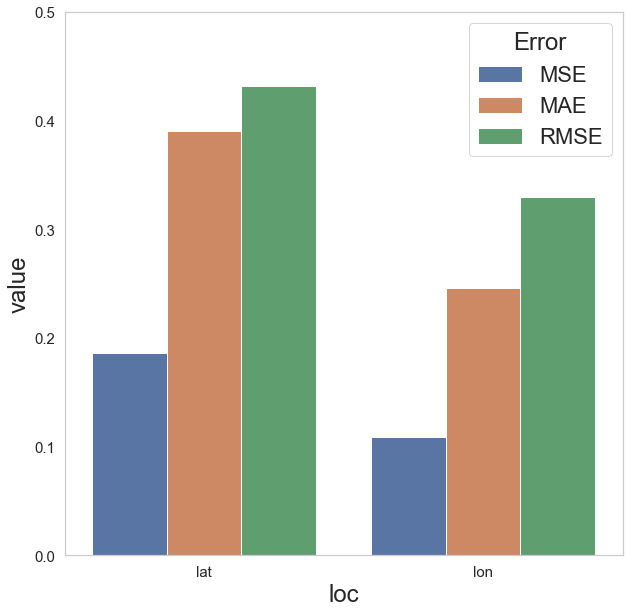

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=2)
sns.set_style("whitegrid", {'axes.grid' : False})

Rfr_skill= pd.read_csv('Lat_lon_skill6.csv', delimiter=',')
print(Rfr_skill.head())

#plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(10, 10))
#fig, ax = plt.figure(figsize=(10, 10))
sns.barplot(data=Rfr_skill, x="loc", y="value",hue="Error")
ax.set_ylim(0,0.5)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=12)


sns.set_context("paper", font_scale=0.9)
#sns.set_style("whitegrid")
plt.savefig("Skill1.png", dpi=150)

   loc Error     value  Unnamed: 3  Unnamed: 4  Unnamed: 5
0  lat   MSE  0.186038         NaN         NaN         NaN
1  lon   MSE  0.108638         NaN         NaN         NaN
2  lat   MAE  0.390716         NaN         NaN         NaN
3  lon   MAE  0.246047         NaN         NaN         NaN
4  lat  RMSE  0.431321         NaN         NaN         NaN


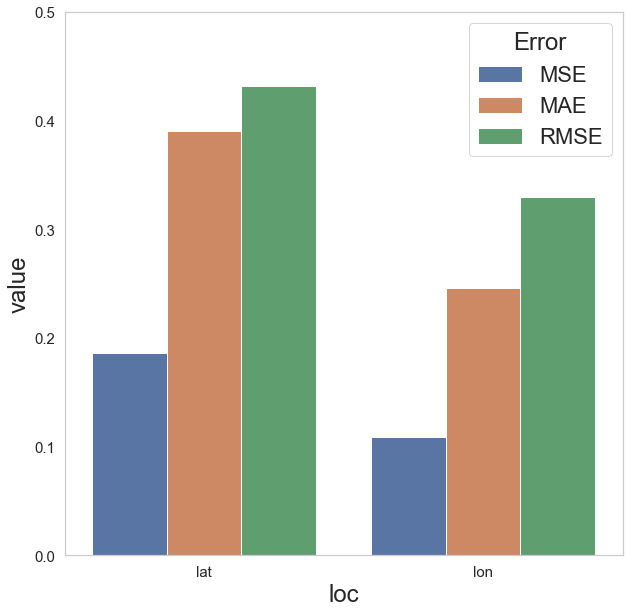

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=2)
sns.set_style("whitegrid", {'axes.grid' : False})

Rfr_skill= pd.read_csv('Lat_lon_skill6.csv', delimiter=',')
print(Rfr_skill.head())

#plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(10, 10))
#fig, ax = plt.figure(figsize=(10, 10))
sns.barplot(data=Rfr_skill, x="loc", y="value",hue="Error")
ax.set_ylim(0,0.5)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=12)


sns.set_context("paper", font_scale=0.9)
#sns.set_style("whitegrid")
plt.savefig("Skill2.png", dpi=150)

   loc Error     value  Unnamed: 3  Unnamed: 4  Unnamed: 5
0  lat   MSE  0.222756         NaN         NaN         NaN
1  lon   MSE  0.092779         NaN         NaN         NaN
2  lat   MAE  0.426588         NaN         NaN         NaN
3  lon   MAE  0.229383         NaN         NaN         NaN
4  lat  RMSE  0.471971         NaN         NaN         NaN


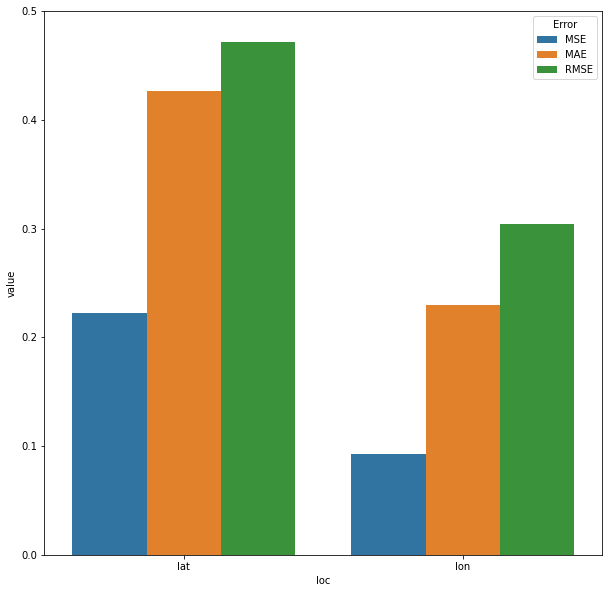

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
Rfr_skill= pd.read_csv('Lat_lon_skill7.csv', delimiter=',')
print(Rfr_skill.head())

fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=Rfr_skill, x="loc", y="value",hue="Error")
ax.set_ylim(0.0,0.5)
plt.savefig("Skill2.png", dpi=150)

In [48]:
#df.to_csv('Normalised_data.csv',path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', lineterminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Normalise and transform the data
col_Names=["staX", "staY","staZ","Max_locX","Max_locY","Max_locZ", "lat", "lon", "elevation"]
my_CSV_File= pd.read_csv("output.txt",delimiter=' ',names=col_Names)
my_CSV_File=my_CSV_File.dropna()
#my_CSV_File['lat']=my_CSV_File['lat']#.astype("int")
#my_CSV_File['elevation']=my_CSV_File['elevation'].astype("int")
print(my_CSV_File.head())

#X = my_CSV_File.drop('elevation',axis=1)
X = my_CSV_File.drop('lat',axis=1)
#X = X.drop('lon',axis=1)
#X = X.drop('lat',axis=1)
y = my_CSV_File['lat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#-----------------------------------------------------
#y_train=pd.DataFrame(y_train)
y_train=y_train.values
y_test=y_test.values
#-----------------------------------------------------
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
#-----------------------------------------------------
scaler = MinMaxScaler()
y_train_sc = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_sc = scaler.transform(y_test.reshape(-1, 1))
#-----------------------------------------------------




            staX          staY          staZ   Max_locX   Max_locY   Max_locZ  \
68  5.766476e-09  5.293242e-09  4.149446e-09  6326976.0  6327006.0  6326110.0   
69  5.840554e-08  1.292371e-07  1.036739e-07  6325696.0  6325459.0  6326350.0   
70  4.824228e-08  1.200260e-09  1.332818e-08  6323761.0  6324624.0  6324666.0   
71  3.297897e-08  3.460322e-08  3.115825e-09  6325757.0  6325355.0  6325381.0   
72  5.225348e-08  4.148908e-09  3.242134e-09  6325605.0  6325182.0  6325280.0   

         lat        lon  elevation  
68  35.15252 -118.01649      710.0  
69  35.52495 -117.36453      670.0  
70  35.81574 -117.59751      775.0  
71  36.27148 -117.59214     1477.4  
72  35.26742 -117.84581      908.0  


In [9]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)


RandomForestRegressor()

In [10]:
import sklearn
rfc_pred = rfc.predict(X_test)
#sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)
MSE=sklearn.metrics.mean_squared_error(y_test, rfc_pred, sample_weight=None, multioutput='uniform_average', squared=True)
MAE=sklearn.metrics.mean_absolute_error(y_test, rfc_pred, sample_weight=None, multioutput='uniform_average')
RMSE=sklearn.metrics.mean_squared_error(y_test, rfc_pred, sample_weight=None, multioutput='uniform_average', squared=False)
print(MSE)
print(MAE)
print(RMSE)
#print(confusion_matrix(y_test,rfc_pred))

0.007911229367861337
0.06623797619048487
0.08894509187055426


In [25]:
import sklearn
rfc_pred = rfc.predict(X_test)
#sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)
MSE=sklearn.metrics.mean_squared_error(y_test, rfc_pred, sample_weight=None, multioutput='uniform_average', squared=True)
MAE=sklearn.metrics.mean_absolute_error(y_test, rfc_pred, sample_weight=None, multioutput='uniform_average')
print(MSE)
print(MAE)
#print(confusion_matrix(y_test,rfc_pred))

4.902246386788284
0.9958635430554671


In [26]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
#print(classification_report(y_test,predictions))
#print(confusion_matrix(y_test,predictions))

In [76]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)
print(lm.coef_)


1564.54508765277
[-6.79469465e+05  3.06712681e+05  3.90433386e+06  9.97244558e-05
  1.87523993e-05 -3.56075318e-04  2.25580316e-01  2.57900821e-04]


In [77]:
X_train.columns
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
staX,-6.794695e+05
staY,3.067127e+05
staZ,3.904334e+06
Max_locX,9.972446e-05
Max_locY,1.875240e-05
Max_locZ,-3.560753e-04
lon,2.255803e-01
elevation,2.579008e-04


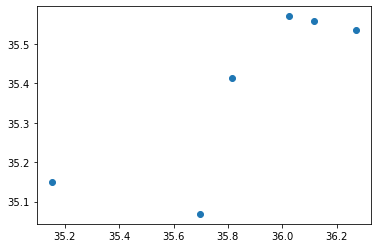

In [78]:
#Predictions
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

In [79]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.4632785776606501
MSE: 0.2688488908247171
RMSE: 0.5185064038415698


In [82]:
import scipy
#sklearn.feature_selection.r_regression(y_test, rfc_pred, center=True, force_finite=True)
scipy.stats.pearsonr(y_test, rfc_pred)#[source]


(0.20739287392921932, 0.6933708599446322)

In [54]:
print(data.shape[0])
a=8640000/1000
print(a)

8640000
8640.0


          filename       lat        lon  elevation
0  CI.CCA..HHE.npy  35.15252 -118.01649      710.0
1  CI.CCA..HHN.npy  35.15252 -118.01649      710.0
2  CI.CCA..HHZ.npy  35.15252 -118.01649      710.0
3  CI.CCC..HHE.npy  35.52495 -117.36453      670.0
4  CI.CCC..HHN.npy  35.52495 -117.36453      670.0
['filename' 'lat' 'lon' 'elevation']


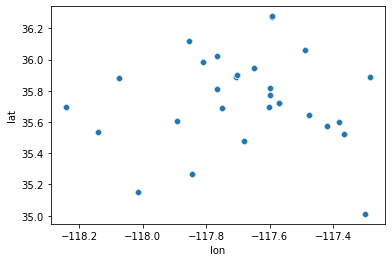

In [22]:
#import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

#station_data = pd.read_fwf('station_info_unique.txt', delimiter='')
station_data = pd.read_csv('station_info_unique.txt', delimiter=' ')
print(station_data.head())
print(station_data.columns.values)

#plt.scatter(x=station_data['lon'], y=station_data['lon'])
sns.scatterplot(data=station_data, x='lon', y='lat')
plt.show()

In [49]:
import pandas as pd


In [25]:
import scipy
import numpy as np
from os import listdir
from os.path import isfile, join
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
folder = "July4th"
file_names = [f for f in listdir(folder) if isfile(join(folder, f))]

In [28]:
file = np.load(f'{folder}/{file_names[0]}')
x = range(0, file.shape[0])

In [29]:
file

array([-4.08577043e-08, -4.07722812e-08, -4.06891671e-08, ...,
       -7.68074626e-11, -7.61478908e-11, -7.76553961e-11])

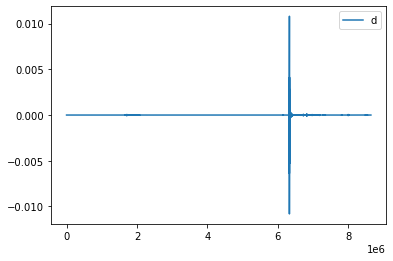

In [30]:
plt.plot(x, file)
plt.legend('data', loc='best')
plt.show()

In [31]:
file_resampled = np.mean(file.reshape(-1, 100), axis=1)
x_new = range(0,file_resampled.shape[0])

In [34]:
df_earthquakes = pd.read_csv("catalog_ridgecrest.txt", delimiter= " ")

In [ ]:
df_earthquakes = df_earthquakes[df_earthquakes["day"] == 4]

In [35]:
df_earthquakes

,year,month,day,hour,minute,second,lat_reloc,lon_reloc,depth_reloc,mag
0,2019,7,4,11,51,8.099,36.11160,-117.66895,3.757,0.73
1,2019,7,4,16,7,20.315,35.70531,-117.49551,11.320,0.50
2,2019,7,4,16,13,43.404,35.70529,-117.49534,11.340,1.50
3,2019,7,4,17,2,55.456,35.70806,-117.49754,11.366,3.98
4,2019,7,4,17,9,20.158,35.70658,-117.49545,11.319,2.49
...,...,...,...,...,...,...,...,...,...,...
111913,2019,7,25,14,49,38.633,35.68821,-117.54604,1.464,1.13
111914,2019,7,25,14,50,46.709,35.66682,-117.46239,9.557,1.47
111915,2019,7,25,14,52,27.327,35.86408,-117.68648,7.376,0.20
111916,2019,7,25,14,56,56.864,35.93835,-117.67905,3.772,0.84


In [42]:
#create a column for earthquakes where 1 is True and 0 means False using 1.0 magnitude as a threshold
#newdf = df[(df['col1']>2) & (df['col2']==444)]
#df_earthquakes['Earthquake']=
a=df_earthquakes[(df_earthquakes['mag']>=1.0)]
print(a.head())

   year  month  day  hour  minute  second  lat_reloc  lon_reloc  depth_reloc  \
2  2019      7    4    16      13  43.404   35.70529 -117.49534       11.340   
3  2019      7    4    17       2  55.456   35.70806 -117.49754       11.366   
4  2019      7    4    17       9  20.158   35.70658 -117.49545       11.319   
6  2019      7    4    17      12  14.984   35.70535 -117.49529       11.027   
7  2019      7    4    17      12  38.149   35.70544 -117.49547       11.010   

    mag  
2  1.50  
3  3.98  
4  2.49  
6  2.13  
7  1.91  


In [43]:
#a=df_earthquakes[(df_earthquakes['mag']>=1.0)]
#print(a.head())

def Set_EQuake_threshold(x):
    if x>=1.0 :
        return 1
    else:
        return 0
    

df_earthquakes['Earthquake']=df_earthquakes['mag'].apply(Set_EQuake_threshold)
print(df_earthquakes.head())

   year  month  day  hour  minute  second  lat_reloc  lon_reloc  depth_reloc  \
0  2019      7    4    11      51   8.099   36.11160 -117.66895        3.757   
1  2019      7    4    16       7  20.315   35.70531 -117.49551       11.320   
2  2019      7    4    16      13  43.404   35.70529 -117.49534       11.340   
3  2019      7    4    17       2  55.456   35.70806 -117.49754       11.366   
4  2019      7    4    17       9  20.158   35.70658 -117.49545       11.319   

    mag  Earthquake  
0  0.73           0  
1  0.50           0  
2  1.50           1  
3  3.98           1  
4  2.49           1  


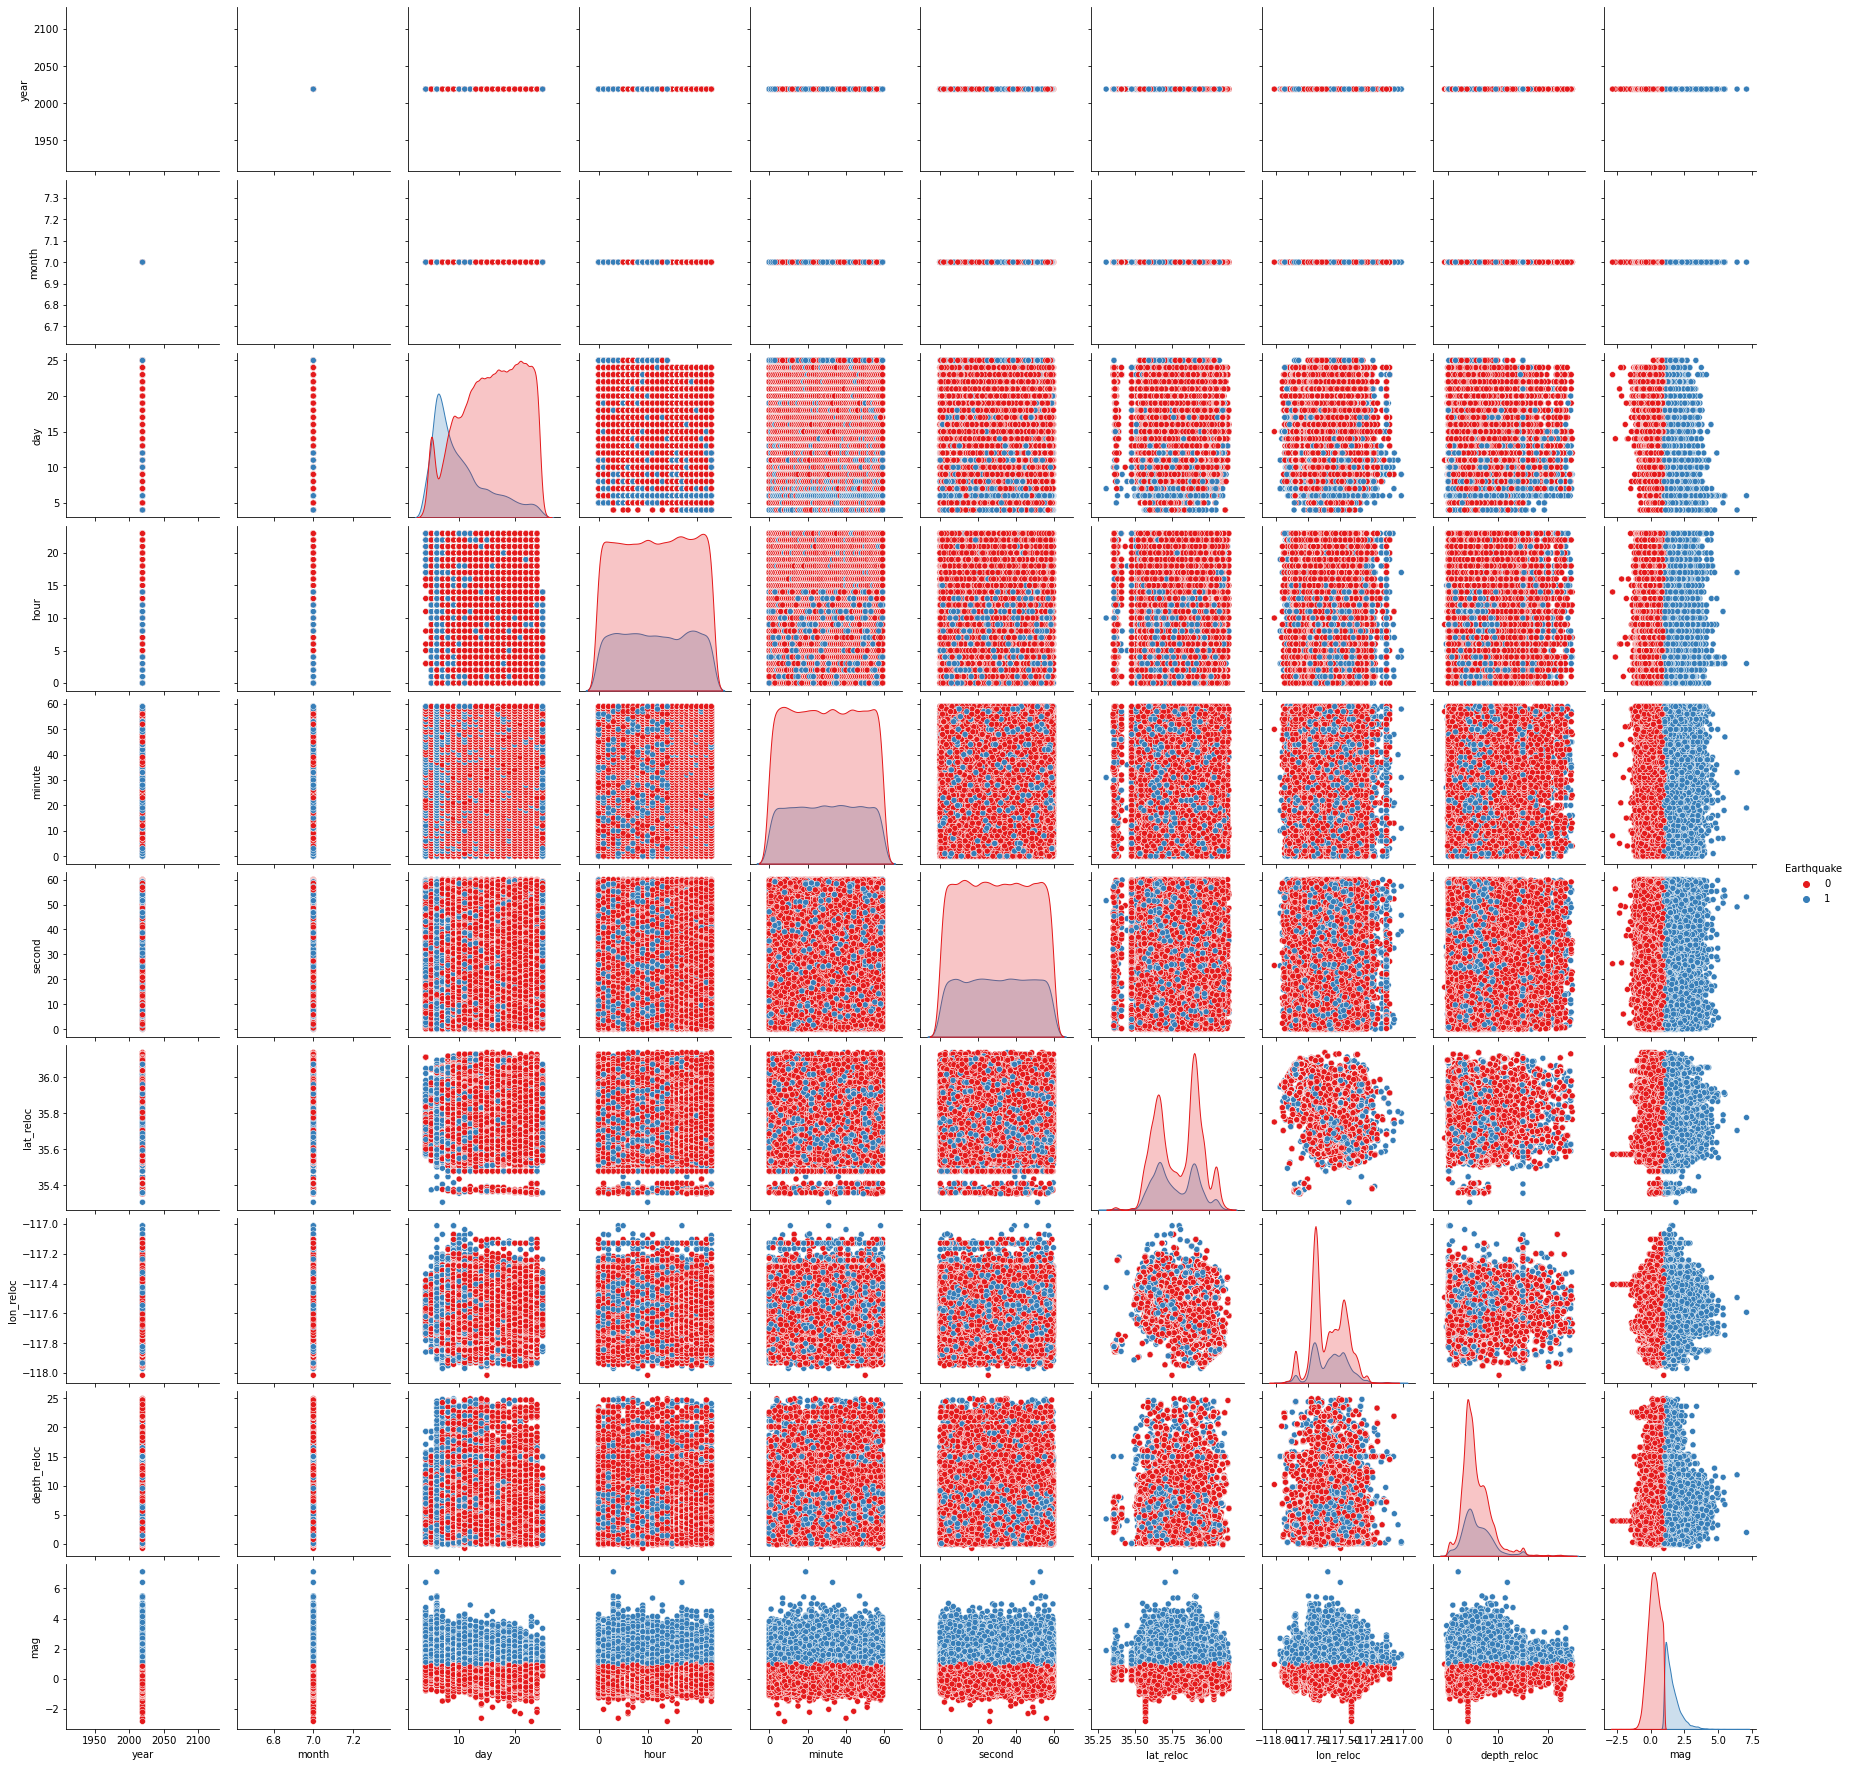

In [45]:
#sns.pairplot(df,hue='Kyphosis',palette='Set1')
sns.pairplot(df_earthquakes,hue='Earthquake',palette='Set1')

In [50]:
from sklearn.model_selection import train_test_split

X = df_earthquakes.drop('Earthquake',axis=1)
X = X.drop('mag',axis=1)
y = df_earthquakes['Earthquake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [51]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81     24570
           1       0.48      0.50      0.49      9006

    accuracy                           0.72     33576
   macro avg       0.65      0.65      0.65     33576
weighted avg       0.72      0.72      0.72     33576

[[19629  4941]
 [ 4505  4501]]


In [ ]:
#loading in data for each station

#NOAMI Shakespeare's code
#directory = '/home/eenmsr/Documents/DSG/Data/July4th/'
directory = '/home/eenmsr/Documents/DSG/Data/July4th/'
stations = ['CCA', 'CCC', 'CLC', 'DAW', 'DTP', 'HAR', 'JRC2', 'LRL', 'SLA', 'SRT', 'TOW2', 'WBM', 'WBS', 'WCS2', 'WMF','WOR', 'WRC2' ]

data = []
for i in stations:
#finding file names with a station name
    da_dir = glob.glob(directory+"*"+i+"*")
    d3 = []
    for x in da_dir:
    #loading in each orientation
        da= np.load(x)
        da = np.array(da)
        d3.append(da)
    data.append(d3)

In [64]:
#data=np.load("C:/Users/medmbaid/Documents/Alan_Turing_DSG/July4th/CI.CCA..HHE.npy")
from glob import glob


directory = 'C:/Users/medmbaid/Documents/Alan_Turing_DSG/July4th/'
stations = ['CCA', 'CCC', 'CLC', 'DAW', 'DTP', 'HAR', 'JRC2', 'LRL', 'SLA', 'SRT', 'TOW2', 'WBM', 'WBS', 'WCS2', 'WMF','WOR', 'WRC2' ]

data = []
for i in stations:
#finding file names with a station name
    da_dir = glob(directory+"*"+i+"*")
    d3 = []
    for x in da_dir:
    #loading in each orientation
        da= np.load(x)
        da = np.array(da)
        d3.append(da)
    data.append(d3)
    
print(data)

[[array([-4.08577043e-08, -4.07722812e-08, -4.06891671e-08, ...,
       -7.68074626e-11, -7.61478908e-11, -7.76553961e-11]), array([-3.62328516e-08, -3.61593436e-08, -3.60816249e-08, ...,
       -1.31818736e-10, -1.27556001e-10, -1.29065730e-10]), array([-2.43040032e-08, -2.42548298e-08, -2.42052609e-08, ...,
       -1.51104781e-10, -1.50749376e-10, -1.51076921e-10])], [array([1.38660351e-06, 1.38375469e-06, 1.38091755e-06, ...,
       1.92290751e-10, 1.93344551e-10, 1.92434585e-10]), array([ 3.48742778e-06,  3.48024136e-06,  3.47309472e-06, ...,
       -3.12944045e-10, -3.12368023e-10, -3.13575981e-10]), array([-7.61673302e-07, -7.60107804e-07, -7.58542767e-07, ...,
       -1.42770961e-10, -1.38157197e-10, -1.41440712e-10])], [array([-3.37698083e-07, -3.37001775e-07, -3.36306603e-07, ...,
        1.43562471e-10,  1.43880958e-10,  1.47015453e-10]), array([2.19648560e-08, 2.19200032e-08, 2.18721892e-08, ...,
       2.63906437e-10, 2.66354715e-10, 2.67850192e-10]), array([2.77161630e-07,

In [66]:
#data=np.load("C:/Users/medmbaid/Documents/Alan_Turing_DSG/July4th/CI.CCA..HHE.npy")
from glob import glob


directory = 'C:/Users/medmbaid/Documents/Alan_Turing_DSG/July4th/'
stations = ['CCA', 'CCC', 'CLC', 'DAW', 'DTP', 'HAR', 'JRC2', 'LRL', 'SLA', 'SRT', 'TOW2', 'WBM', 'WBS', 'WCS2', 'WMF','WOR', 'WRC2' ]

data = []
for i in stations:
#finding file names with a station name
    da_dir = glob(directory+"*"+i+"*")
    d3 = []
    for x in da_dir:
    #loading in each orientation
        da= np.load(x)
        da = np.mean(da)   #Using mean instead of an array
        d3.append(da)
    data.append(d3)
    
print(data)

[[-9.774676222473325e-13, -8.733099665605967e-13, -5.833580367317793e-13], [3.3402964085665126e-11, 8.404095944993306e-11, -1.8367975285949288e-11], [-8.110679584177432e-12, 5.193934811811926e-13, 6.677320956654978e-12], [2.1069168408748876e-11, 2.121702396124608e-11, 2.541915670580417e-12], [-8.770307181973168e-12, -7.352648879660248e-13, -6.024163584205183e-14], [-2.1504818847346858e-12, 7.053525596865336e-13, 1.0307157337976128e-13], [8.51846673135982e-12, 1.3875686292029465e-11, -1.2827956668189232e-11], [-4.545520296868071e-11, 7.691706318122694e-11, -6.230640620147177e-12], [3.2179624772674007e-11, -3.112165832928661e-12, 6.471146249638539e-12], [-6.614307472508908e-12, -4.367935129615394e-12, -2.5985696715001804e-12], [3.7963506059184384e-11, 9.921957833505208e-12, -1.4288076920332494e-12], [7.6009658951226e-12, 4.890024831415745e-11, 6.084257820891455e-11], [-2.0769498812211598e-11, -3.416637301232077e-11, -3.392342126276975e-12], [6.141081256936736e-12, -5.1390787667911905e-12

In [65]:
#station_data = pd.read_csv('station_info_unique.txt', delimiter=' ')
df=pd.DataFrame(data)
print(df.head())

                                                   0  \
0  [-4.0857704349092115e-08, -4.077228120419727e-...   
1  [1.386603505777646e-06, 1.3837546916837697e-06...   
2  [-3.3769808342153653e-07, -3.3700177476031884e...   
3  [8.731936791473995e-07, 8.714049528923954e-07,...   
4  [-3.639766929229624e-07, -3.6322991114930014e-...   

                                                   1  \
0  [-3.6232851647703125e-08, -3.6159343561142115e...   
1  [3.487427780706764e-06, 3.480241356382163e-06,...   
2  [2.196485603380677e-08, 2.1920003151495675e-08...   
3  [8.792429010112762e-07, 8.774351648798502e-07,...   
4  [-3.067163634136252e-08, -3.060792761323953e-0...   

                                                   2  
0  [-2.4304003166629855e-08, -2.4254829845794105e...  
1  [-7.616733016137214e-07, -7.601078039592797e-0...  
2  [2.7716163013016743e-07, 2.765890312999846e-07...  
3  [1.0463417790366154e-07, 1.044110581369348e-07...  
4  [-2.4810563032288153e-09, -2.475299615123148e-..